In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.tree import plot_tree


In [2]:
data=pd.read_csv("Fraud_check1.csv")

In [3]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
    from sklearn import preprocessing

In [5]:
le = preprocessing.LabelEncoder()

In [6]:
data["Undergrad"]=le.fit_transform(data["Undergrad"])
data["Marital.Status"]=le.fit_transform(data["Marital.Status"])
data["Urban"]=le.fit_transform(data["Urban"])

In [7]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [8]:
data=data.rename({"Marital.Status":"Marital"},axis=1)
data=data.rename({"Taxable.Income":"Taxable"},axis=1)
data=data.rename({"City.Population":"Population"},axis=1)
data=data.rename({"Marital.Status":"Marital"},axis=1)
data=data.rename({"Work.Experience":"Work"},axis=1)

In [9]:
data.isnull().sum()

Undergrad     0
Marital       0
Taxable       0
Population    0
Work          0
Urban         0
dtype: int64

In [10]:
data=data.assign(Tax=pd.cut(data['Taxable'], 
                               bins=[ 0,30000,100000], 
                               labels=['Good', 'Risk']))

In [11]:
data

,Undergrad,Marital,Taxable,Population,Work,Urban,Tax
0,0,2,68833,50047,10,1,Risk
1,1,0,33700,134075,18,1,Risk
2,0,1,36925,160205,30,1,Risk
3,1,2,50190,193264,15,1,Risk
4,0,1,81002,27533,28,0,Risk
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Risk
596,1,0,69967,55369,2,1,Risk
597,0,0,47334,154058,0,1,Risk
598,1,1,98592,180083,17,0,Risk


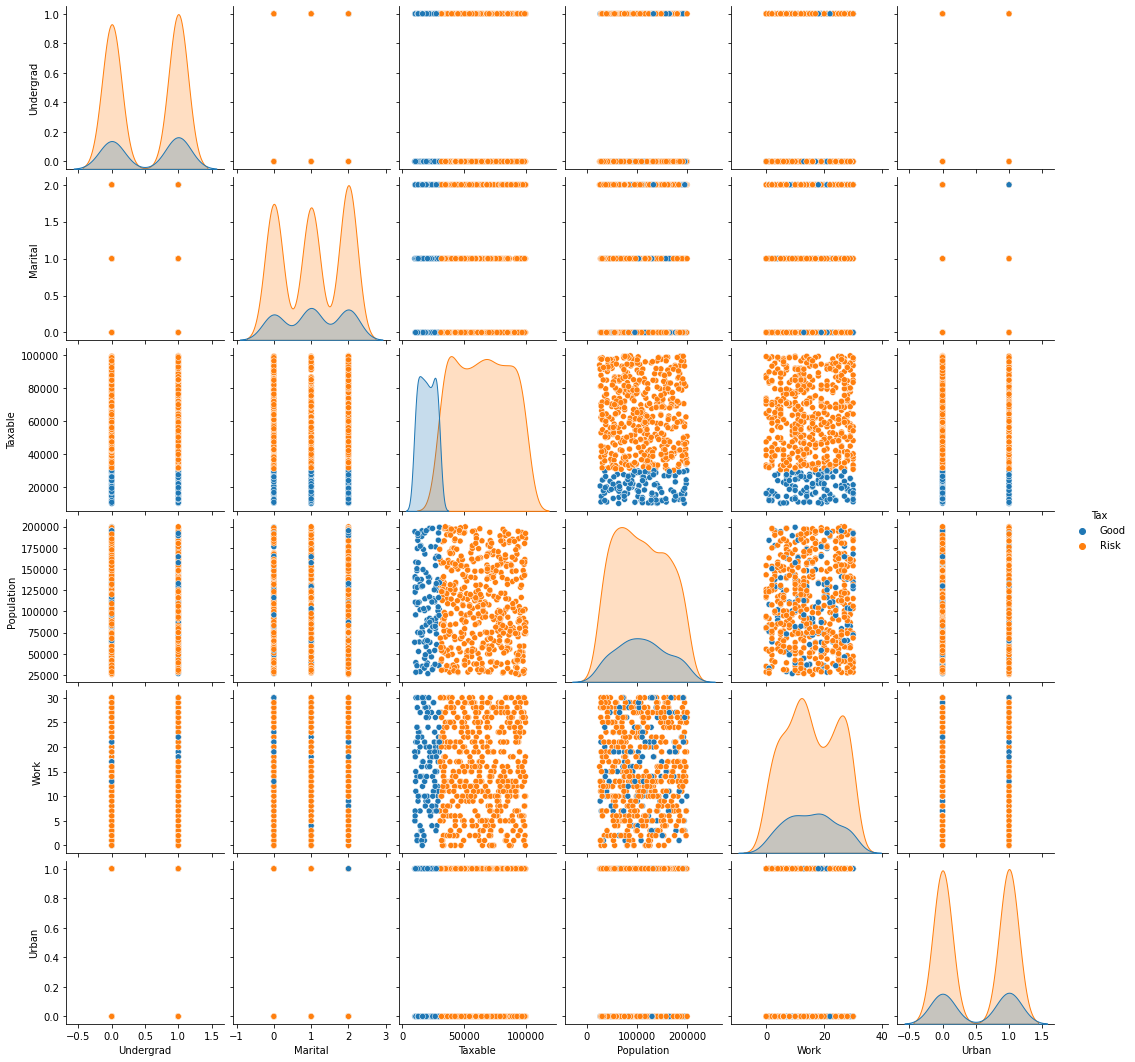

In [12]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=data, hue = "Tax")

<AxesSubplot:>

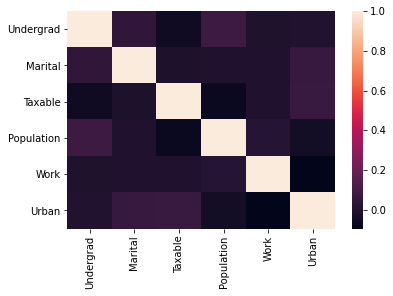

In [13]:
# correlation matrix
sns.heatmap(data.corr())

In [14]:
target = pd.DataFrame.astype(data['Tax'], dtype="object")
df1 = data.copy()
df1 = df1.drop('Tax', axis =1)

In [16]:
# Defining the attributes
X = df1


In [17]:
target = target.fillna('').apply(str)
target

0      Risk
1      Risk
2      Risk
3      Risk
4      Risk
       ... 
595    Risk
596    Risk
597    Risk
598    Risk
599    Risk
Name: Tax, Length: 600, dtype: object

In [18]:
#label encoding
target = le.fit_transform(target)
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [19]:
y = target


In [20]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state =25)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (480, 6)
Testing split input-  (120, 6)


In [21]:
# Defining the random forest algorithm

model=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)

# prediction on test set
y_pred=model.predict(X_test)
results=cross_val_score(model,X,y)


In [22]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
y_pred=model.predict(X_test)


In [24]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [26]:
model.predict([[1,5,3,78,9,5,]])

array([0])

### Here, 0 indicates the tax type good.

### Finding Important Features

In [27]:
feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Taxable       0.914667
Population    0.041303
Work          0.028803
Marital       0.007862
Urban         0.003791
Undergrad     0.003575
dtype: float64

No handles with labels found to put in legend.


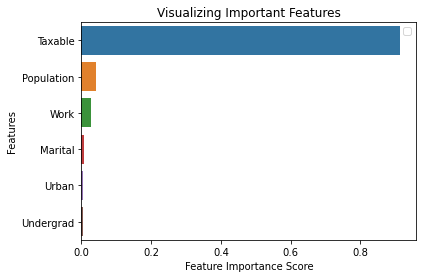

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()